In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import json
import os

## Get all the directories

In [2]:
path_dir = './model_epoch'
folder_index = len(path_dir) + 1
subdirs = [x[0] for x in os.walk(path_dir)]
subdirs.remove(path_dir)
subdirs.sort()
print(subdirs)

['./model_epoch/model1', './model_epoch/model1_3_smaller_hidden_size', './model_epoch/model1_nodropout', './model_epoch/model_with_stats', './model_epoch/model_with_stats_3_smaller_hidden_size', './model_epoch/model_with_stats_nodropout']


## Functions for parsing JSON file

In [3]:
def list_files(subdir):
    """ Return a list of file paths in subdir. 
    """
    paths = []
    files = [x[2] for x in os.walk(subdir)][0]
    for file in files:
        paths.append(subdir + '/' + file)
    return paths

In [4]:
def get_losses(json_path):
    """ Return the training loss and validation loss of an epoch
    reading from json_path. 
    """
    with open(json_path) as f:
        data = json.load(f)
    
    return data['epoch'], data['training_loss'], data['validation_loss']

In [5]:
def get_loss_trajectories(subdir):
    """ Return the training and validation loss trajectories as
    a pandas dataframe containing columns 'epoch', 'train_loss', 'val_loss'. 
    """
    paths = list_files(subdir)
    collection = {'epoch':[], 'train_loss':[], 'val_loss':[]}
    for path in paths:
        ep, tl, vl = get_losses(path)
        collection['epoch'].append(ep)
        collection['train_loss'].append(tl)
        collection['val_loss'].append(vl)
        
    traj_df = pd.DataFrame.from_dict(collection)
    traj_df = traj_df.sort_values(by=['epoch'])
    traj_df = traj_df.set_index('epoch')
    
    return traj_df

In [6]:
def plot_trajectories(subdir):
    traj_df = get_loss_trajectories(subdir)
    
    title = subdir[folder_index:].replace('_', ' ')
    figure, ax = plt.subplots()
    
    traj_df.plot(ax=ax,  
                 sharex=True, 
                 title=title, 
                 legend=True, 
                 grid=True)
    

## Plots

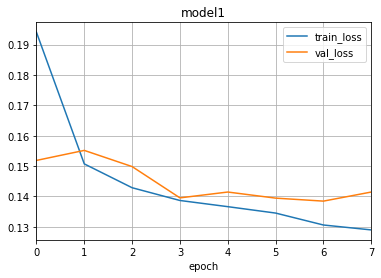

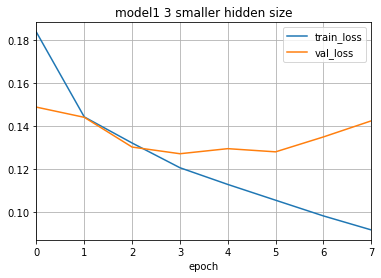

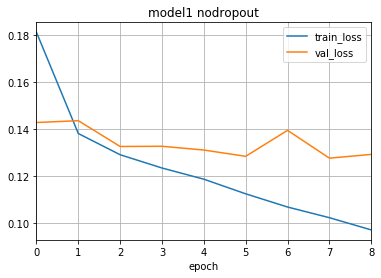

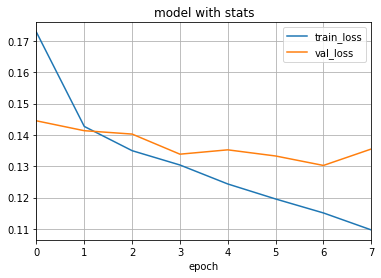

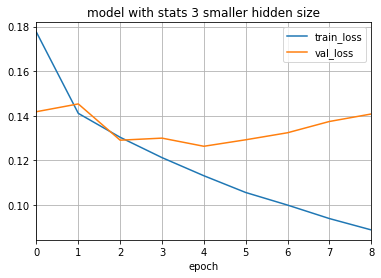

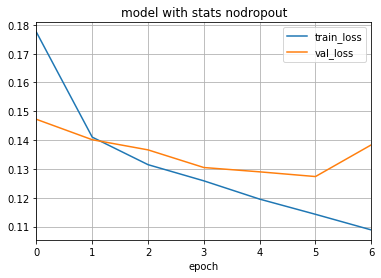

In [7]:
for subdir in subdirs:
    plot_trajectories(subdir)